# Lambda notebook demo v. 1.0.1
## Author: Kyle Rawlins

This notebook provides a demo of the core capabilities of the lambda notebook, aimed at linguists who already have training in semantics (but not necessarily implemented semantics).

Last updated Dec 2018. Version history:

 * 0.5: first version
 * 0.6: updated to work with refactored class hierarchy (Apr 2013)
 * 0.6.1: small fixes to adapt to changes in various places (Sep 2013)
 * 0.7: various fixes to work with alpha release (Jan 2014)
 * 0.9: substantial updates, merge content from LSA poster (Apr 2014)
 * 0.95: substantial updates for a series of demos in Apr-May 2014
 * 1.0: various changes / fixes, more stand-alone text (2017)
 * 1.0.1: small tweaks (Nov/Dec 2018)
 
To run through this demo incrementally, use shift-enter (runs and moves to next cell).  If you run things out of order, you may encounter problems (missing variables etc.)

In [1]:
reload_lamb()
from lamb.types import TypeMismatch, type_e, type_t, type_property
from lamb.meta import TypedTerm, TypedExpr, LFun, CustomTerm
from IPython.display import display

In [2]:
# Just some basic configuration
meta.constants_use_custom(False)
lang.bracket_setting = lang.BRACKET_FANCY
lamb.display.default(style=lamb.display.DerivStyle.BOXES) # you can also try lamb.display.DerivStyle.PROOF

# First pitch

Have you ever wanted to type something like this in, and have it actually do something?

In [3]:
%%lamb
||every|| = λ f_<e,t> : λ g_<e,t> : Forall x_e : f(x) >> g(x)
||student|| = L x_e : Student(x)
||danced|| = L x_e : Danced(x)

INFO (core): Coerced guessed type for 'Student_t' into <e,t>, to match argument 'x_e'
INFO (core): Coerced guessed type for 'Danced_t' into <e,t>, to match argument 'x_e'


$[\![\mathbf{\text{every}}]\!]^{}_{\left\langle{}\left\langle{}e,t\right\rangle{},\left\langle{}\left\langle{}e,t\right\rangle{},t\right\rangle{}\right\rangle{}} \:=\: $$\lambda{} f_{\left\langle{}e,t\right\rangle{}} \: . \: \lambda{} g_{\left\langle{}e,t\right\rangle{}} \: . \: \forall{} x_{e} \: . \: ({f}({x}) \rightarrow{} {g}({x}))$<br />
$[\![\mathbf{\text{student}}]\!]^{}_{\left\langle{}e,t\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: {Student}({x})$<br />
$[\![\mathbf{\text{danced}}]\!]^{}_{\left\langle{}e,t\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: {Danced}({x})$

In [4]:
r = ((every * student) * danced)
r

CompositionResult(results=[⟦[[every student] danced]⟧ = (Forall x_e: (Student_<e,t>(x_e) >> Danced_<e,t>(x_e)))], failures=[⟦[danced [every student]]⟧ = Type mismatch: '⟦danced⟧ = (λ x_e: Danced_<e,t>(x_e))'/<e,t> and '⟦[every student]⟧ = (λ g_<e,t>: (Forall x_e: (Student_<e,t>(x_e) >> g_<e,t>(x_e))))'/<<e,t>,t> conflict (Function Application), ⟦[[every student] danced]⟧ = Type mismatch: '⟦[every student]⟧ = (λ g_<e,t>: (Forall x_e: (Student_<e,t>(x_e) >> g_<e,t>(x_e))))'/<<e,t>,t> and '⟦danced⟧ = (λ x_e: Danced_<e,t>(x_e))'/<e,t> conflict (Predicate Modification), ⟦[[every student] danced]⟧ = Composition failure (PA requires a valid binder) on: ⟦[every student]⟧ = (λ g_<e,t>: (Forall x_e: (Student_<e,t>(x_e) >> g_<e,t>(x_e)))) * ⟦danced⟧ = (λ x_e: Danced_<e,t>(x_e)), ⟦[danced [every student]]⟧ = Composition failure (PA requires a valid binder) on: ⟦danced⟧ = (λ x_e: Danced_<e,t>(x_e)) * ⟦[every student]⟧ = (λ g_<e,t>: (Forall x_e: (Student_<e,t>(x_e) >> g_<e,t>(x_e)))), ⟦[[every student] danced]⟧ = Type mismatch: '⟦[every student]⟧ = (λ g_<e,t>: (Forall x_e: (Student_<e,t>(x_e) >> g_<e,t>(x_e))))'/<<e,t>,t> and '⟦danced⟧ = (λ x_e: Danced_<e,t>(x_e))'/<e,t> conflict (Need at least one fully vacuous element)])

In [5]:
r.tree()

1 composition path:<br /><div align="center" style="display:table; margin:5px; border-collapse: collapse;border: 1px solid #848482;"><div align="center" style="display:table-row;border-bottom:1px solid #848482"><div style="display:table-cell;vertical-align:middle;"><div style="display: table;"><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:table; margin:5px; border-collapse: collapse;border: 1px solid #848482;"><div align="center" style="display:table-row;border-bottom:1px solid #848482"><div style="display:table-cell;vertical-align:middle;"><div style="display: table;"><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:table;table-layout:auto;" align="center"><div style="display:table-row;"><div style="display:table-cell;padding-right:2px; padding-left:2px;" align="center"><div style="display:inline-block;"><span>$[\![\mathbf{\text{every}}]\!]^{}_{\left\langle{}\left\langle{}e,t\right\rangle{},\left\langle{}\left\langle{}e,t\right\rangle{},t\right\rangle{}\right\rangle{}}$</span></div></div></div><div style="display:table-row;"><div style="display:table-cell;padding-right:2px; padding-left:2px;" align="center"><div style="display:inline-block;"><span>$\lambda{} f_{\left\langle{}e,t\right\rangle{}} \: . \: \lambda{} g_{\left\langle{}e,t\right\rangle{}} \: . \: \forall{} x_{e} \: . \: ({f}({x}) \rightarrow{} {g}({x}))$</span></div></div></div></div></div></div><div style="align: center; vertical-align: middle; display: table-cell;"><span style="padding:1em;">*</span></div><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:table;table-layout:auto;" align="center"><div style="display:table-row;"><div style="display:table-cell;padding-right:2px; padding-left:2px;" align="center"><div style="display:inline-block;"><span>$[\![\mathbf{\text{student}}]\!]^{}_{\left\langle{}e,t\right\rangle{}}$</span></div></div></div><div style="display:table-row;"><div style="display:table-cell;padding-right:2px; padding-left:2px;" align="center"><div style="display:inline-block;"><span>$\lambda{} x_{e} \: . \: {Student}({x})$</span></div></div></div></div></div></div></div></div><div style="display:table-cell;vertical-align:middle;border-left:1px solid #848482;padding:0.5em"><div style="white-space:nowrap; color:blue;"><b>[<div style="display:inline-block;"><span>FA</span></div>]</b></div></div></div><div align="center" style="display:table-row;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:table-cell;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:table;table-layout:auto;" align="center"><div style="display:table-row;"><div style="display:table-cell;padding-right:2px; padding-left:2px;" align="center"><div style="display:inline-block;"><span>$[\![\mathbf{\text{[every student]}}]\!]^{}_{\left\langle{}\left\langle{}e,t\right\rangle{},t\right\rangle{}}$</span></div></div></div><div style="display:table-row;"><div style="display:table-cell;padding-right:2px; padding-left:2px;" align="center"><div style="display:inline-block;"><span>$\lambda{} g_{\left\langle{}e,t\right\rangle{}} \: . \: \forall{} x_{e} \: . \: ({Student}({x}) \rightarrow{} {g}({x}))$</span></div></div></div></div></div></div><div style="display:table-cell;"></div></div></div></div><div style="align: center; vertical-align: middle; display: table-cell;"><span style="padding:1em;">*</span></div><div style="display:table-cell;v

# Two problems in formal semantics #

1. Type-driven computation could be a lot easier to visualize and check.  (Q: could it be made too easy?)

2. Grammar fragments as in Montague Grammar: good idea in principle, hard to use in practice.

  * A **fragment** is a *complete* formalization of *sublanguage* consisting of the *key relevant phenomena* for the problem at hand.  (Potential problem-points italicized.)

Solution: a system for developing interactive fragments: "*IPython Lambda Notebook*"

* Creator can work interactively with analysis -- accelerate development, limit time spent on tedious details.
* Reader can explore derivations in ways that are not typically possible in typical paper format.
* Creator and reader can be certain that derivations work, verified by the system.
* Bring closer together formal semantics and computational modeling.

Inspired by:

 * Von Eijck and Unger (2013): implementation of compositional semantics in Haskell.  No interface (beyond standard Haskell terminal); great if you like Haskell.  Introduced the idea of a fragment in digital form.
 * UPenn Lambda calculator (Champollion, Tauberer, and Romero 2007): teaching oriented.  (Now under development again.)
 * `nltk.sem`: implementation of the lambda calculus with a typed metalanguage, interface with theorem provers.  No interactive interface.
 * Jealousy of R studio, Matlab, Mathematica, etc.

### The role of formalism & fragments ###

What does *formal* mean in semantics?  What properties should a theory have?

 1. Mathematically precise (lambda calculus, type theory, logic, model theory(?), ...)
 2. Complete (covers "all" the relevant data).
 3. Predictive (like any scientific theory).
 4. Consistent, or at least compatible (with itself, analyses of other phenomena, some unifying conception of the grammar).
 
The *method of fragments* (Partee 1979, Partee and Hendriks 1997) provides a structure for meeting these criteria.

 * Paper with a fragment provides a working system.  (Probably.)
 * Explicit outer bound for empirical coverage.
 * Integration with a particular theory of grammar.  (To some extent.)
 * Explicit answer to many detailed questions not necessarily dealt with in the text.
 
**Claim**: fragments are a method of replicability, similar to a computational modeller providing their model.

 * To be clear, a fragment is neither necessary nor sufficient for having a good theory / analysis / paper...

Additional benefit: useful internal check for researcher.

>"...But I feel strongly that it is important to try to [work with fully explicit fragments] periodically, because otherwise it is extremely easy to think that you have a solution to a problem when in fact you don't." (Partee 1979, p. 41)

### The challenges of fragments

Part 1 of the above quote:

>"It can be very frustrating to try to specify frameworks and fragments explicitly; this project has not been entirely rewarding.  I would not recommend that one always work with the constraint of full explicitness." (Ibid.)

 * Fragments can be tedious and time-consuming to write (not to mention hard).
 * Fragments as traditionally written are in practice not easy for a reader to use.
 
   - Dense/unapproachable.  With exactness can come a huge chunk of hard-to-digest formalism.  E.g. Partee (1979), about 10% of the paper.
   - Monolithic/non-modular.  For the specified sublanguage, everything specified.  Outside the bounds of the sublanguage, nothing specified.  How does the theory fit in with others?
   - Exact opposite of the modern method -- researchers typically hold most aspects of the grammar constant (implicitly) while changing a few key points.  (*Portner and Partee intro*)

**Summary:** In practice, the typical payoff for neither the reader nor the writer of a fragment exceeded the effort.


# A solution: digital fragments

Von Eijck and Unger 2010: specify a fragment in digital form.

* They use Haskell.  Type system of Haskell extremely well-suited to natural language semantics.
* (Provocative statement) Interface, learning curve of Haskell not well suited to semanticists (or most people)?

### Benefits of digital fragments (in principle)

* Interactive.
* Easy to distribute, adapt, modify.
* Possibility of modularity.  (E.g. abstract a 'library' for compositional systems away from the analysis of a particular phenomenon.)
* Bring closer together the CogSci idea of a 'computational model' to the project of natural language semantics.
* Connections to computational semantics. (weak..)

### What sorts of things might we want in a fragment / system for fragments?

* Typed lambda calculus.
* Logic / logical metalanguage.
* Framework for semantic composition.  (Broad...)
* Model theory? (x)
* Interface with theorem provers? (x)

IPython Lambda Notebook aims to provide these tools in a usable, interactive, format.

* Choose Python, rather than Haskell/Java.  Easy learning curve, rapid prototyping, existence of IPython.

**Layer 1**: interface using IPython Notebook.

**Layer 2**: flexible typed metalanguage.

**Layer 3**: composition system for object language, building on layer 2.

## Layer 1: an interface using IPython/Jupyter Notebook (Perez and Granger 2007) ##

 * Client-server system where a specialized IPython "kernel" is running in the background. This kernel implements various tools for formal semantics (see parts 2-3).
 * Page broken down into cells in which can be entered python code, markdown code, raw text, other formats.
 * Jupyter: supports display of graphical representations of python objects.
 * Notebook format uses the "MathJax" framework to enable it to render most math-mode latex.  Can have python objects automatically generate decent-looking formulas.  Can use latex math mode in documentation as well (e.g. $\lambda x \in D_e : \mathit{CAT}(x)$)

This all basically worked off-the-shelf.

* Bulk of interface work so far: rendering code for logical and compositional representations.
* Future: interactive widgets, etc.

In [6]:
meta.pmw_test1

(λ p_t: (λ x_e: (P_<e,t>(x_e) & p_t)))

In [7]:
meta.pmw_test1._repr_latex_()

'$\\lambda{} p_{t} \\: . \\: \\lambda{} x_{e} \\: . \\: ({P}({x}) \\wedge{} {p})$'

&nbsp;

## Part 2: a typed metalanguage ##

The **metalanguage** infrastructure is a set of classes that implement the building blocks of logical expressions, lambda terms, and various combinations combinations. This rests on an implementation of a **type system** that matches what semanticists tend to assume.

Starting point (2012): a few implementations of things like predicate logic do exist, this is an intro AI exercise sometimes.  I started with the [AIMA python](http://code.google.com/p/aima-python/) _Expr_ class, based on the standard Russell and Norvig AI text.  But, had to scrap most of it.  Another starting point would have been `nltk.sem` (I was unaware of its existence at the time.)

Preface cell with `%%lamb` to enter metalanguage formulas directly.  The following cell defines a variable `x` that has type e, and exports it to the notebook's environment.

In [8]:
%%lamb reset
x = x_e # define x to have this type

${x}_{e}\:=\:{x}_{e}$

In [9]:
x.type

e

This next cell defines some variables whose values are more complex object -- in fact, functions in the typed lambda calculus.

In [10]:
%%lamb
test1 = L p_t : L x_e : P(x) & p # based on a Partee et al example
test1b = L x_e : P(x) & Q(x)
t2 = Q(x_e)

INFO (core): Coerced guessed type for 'P_t' into <e,t>, to match argument 'x_e'
INFO (core): Coerced guessed type for 'P_t' into <e,t>, to match argument 'x_e'
INFO (core): Coerced guessed type for 'Q_t' into <e,t>, to match argument 'x_e'
INFO (core): Coerced guessed type for 'Q_t' into <e,t>, to match argument 'x_e'


${test1}_{\left\langle{}t,\left\langle{}e,t\right\rangle{}\right\rangle{}}\:=\:\lambda{} p_{t} \: . \: \lambda{} x_{e} \: . \: ({P}({x}) \wedge{} {p})$<br />
${test1b}_{\left\langle{}e,t\right\rangle{}}\:=\:\lambda{} x_{e} \: . \: ({P}({x}) \wedge{} {Q}({x}))$<br />
${t2}_{t}\:=\:{Q}({x}_{e})$

These are now registered as variables in the python namespace and can be manipulated directly.  A typed lambda calculus is fully implemented with all that that entails -- e.g. the value of `test1` includes the whole syntactic structure of the formula, its type, etc. and can be used in constructing new formulas.  The following cells build a complex function-argument formula, and following that, does the reduction.

(Notice that beta reduction works properly, i.e. bound $x$ in the function is renamed in order to avoid collision with the free `x` in the argument.)

In [11]:
test1(t2)

((λ p_t: (λ x_e: (P_<e,t>(x_e) & p_t))))(Q_<e,t>(x_e))

In [12]:
test1(t2).reduce()

(λ x1_e: (P_<e,t>(x1_e) & Q_<e,t>(x_e)))

In [13]:
%%lamb
catf = L x_e: Cat(x)
dogf = λx: Dog(x_e)

INFO (core): Coerced guessed type for 'Cat_t' into <e,t>, to match argument 'x_e'
INFO (core): Coerced guessed type for 'Dog_t' into <e,t>, to match argument 'x_e'


${catf}_{\left\langle{}e,t\right\rangle{}}\:=\:\lambda{} x_{e} \: . \: {Cat}({x})$<br />
${dogf}_{\left\langle{}e,t\right\rangle{}}\:=\:\lambda{} x_{e} \: . \: {Dog}({x})$

In [14]:
(catf(x)).type

t

In [15]:
catf.type

<e,t>

Type checking of course is a part of all this.  If the types don't match, the computation will throw a `TypeMismatch` exception.  The following cell uses python syntax to catch and print such errors.

In [16]:
result = None
try:
    result = test1(x) # function is type <t<et>> so will trigger a type mismatch.  This is a python exception so adds all sorts of extraneous stuff, but look to the bottom
except TypeMismatch as e:
    result = e
result

Type mismatch: '(λ p_t: (λ x_e: (P_<e,t>(x_e) & p_t)))'/<t,<e,t>> and 'x_e'/e conflict (Function-argument expression: mismatched types)

A more complex expression:

In [17]:
%%lamb
p2 = (Cat_<e,t>(x_e) & p_t) >> (Exists y: Dog_<e,t>(y_e))

${p2}_{t}\:=\:(({Cat}({x}_{e}) \wedge{} {p}_{t}) \rightarrow{} \exists{} y_{e} \: . \: {Dog}({y}))$

What is going on behind the scenes?  The objects manipulated are recursively structured python objects of class TypedExpr.

Class _TypedExpr_: parent class for typed expressions.  Key subclasses:

* BinaryOpExpr: parent class for things like conjunction.
* TypedTerm: variables, constants of arbitrary type
* BindingOp: operators that bind a single variable
  * LFun: lambda expression

Many straightforward expressions can be parsed.  Most expressions are created using a call to TypedExpr.factory, which is abbreviated as "te" in the following examples.  The `%%lamb` magic is calling this behind the scenes.

Three ways of instantiating a variable `x` of type `e`:

In [18]:
%%lamb 
x = x_e # use cell magic

${x}_{e}\:=\:{x}_{e}$

In [19]:
x = te("x_e") # use factory function to parse string
x

x_e

In [20]:
x = meta.TypedTerm("x", types.type_e) # use object constructer
x

x_e

Various convenience python operators are overloaded, including functional calls.  Here is an example repeated from earlier in two forms:

In [21]:
%%lamb
p2 = (Cat_<e,t>(x_e) & p_t) >> (Exists y: Dog_<e,t>(y_e))

${p2}_{t}\:=\:(({Cat}({x}_{e}) \wedge{} {p}_{t}) \rightarrow{} \exists{} y_{e} \: . \: {Dog}({y}))$

In [22]:
p2 = (te("Cat_<e,t>(x)") & te("p_t")) >> te("(Exists y: Dog_<e,t>(y_e))")
p2

((Cat_<e,t>(x_e) ∧ p_t) → (Exists y_e: Dog_<e,t>(y_e)))

Let's examine in detail what happens when a function and argument combine.

In [23]:
catf = meta.LFun(types.type_e, te("Cat(x_e)"), "x")
catf

INFO (core): Coerced guessed type for 'Cat_t' into <e,t>, to match argument 'x_e'


(λ x_e: Cat_<e,t>(x_e))

In [24]:
catf(te("y_e"))

((λ x_e: Cat_<e,t>(x_e)))(y_e)

Building a function-argument expression builds a complex, unreduced expression.  This can be explicitly reduced (note that the `reduce_all()` function would be used to apply reduction  recursively):

In [25]:
catf(te("y_e")).reduce()

Cat_<e,t>(y_e)

In [26]:
(catf(te("y_e")).reduce()).derivation

1. ((λ x_e: Cat_<e,t>(x_e)))(y_e)
 2. Cat_<e,t>(y_e)    (Reduction)

The metalanguage supports some basic type inference.  Type inference happens already on combination of a function and argument into an unreduced expression, not on beta-reduction.

In [27]:
%lamb ttest = L x_X : P_<?,t>(x) # type <?,t>
%lamb tvar = y_t
ttest(tvar)

${ttest}_{\left\langle{}X,t\right\rangle{}}\:=\:\lambda{} x_{X} \: . \: {P}_{\left\langle{}X',t\right\rangle{}}({x})$

${tvar}_{t}\:=\:{y}_{t}$

((λ x_t: P_<t,t>(x_t)))(y_t)

&nbsp;

## Part 3: composition systems for an object language ##

On top of the metalanguage are '**composition systems**' for modeling (step-by-step) semantic composition in an object language such as English.  This is the part of the lambda notebook that tracks and manipulates mappings between object language elements (words, trees, etc) and denotations in the metalanguage.  

A composition at its core consists of a set of composition rules; the following cell defines a simple composition system that will be familiar to anyone who has taken a basic course in compositional semantics.  (This example is just a redefinition of the default composition system.)

In [28]:
# none of this is strictly necessary, the built-in library already provides effectively this system.
fa = lang.BinaryCompositionOp("FA", lang.fa_fun, reduce=True)
pm = lang.BinaryCompositionOp("PM", lang.pm_fun, commutative=False, reduce=True)
pa = lang.BinaryCompositionOp("PA", lang.pa_fun, allow_none=True)
demo_hk_system = lang.CompositionSystem(name="demo system", rules=[fa, pm, pa])
lang.set_system(demo_hk_system)
demo_hk_system

Composition system: demo system

Expressing denotations is done in a `%%lamb` cell, and almost always begins with lexical items.  The following cell defines several lexical items that will be familiar from introductory exercises in the Heim & Kratzer 1998 textbook "Semantics in Generative Grammar".  These definitions produce items that are subclasses of the class `Composable`.

In [29]:
%%lamb
||cat|| = L x_e: Cat(x)
||gray|| = L x_e: Gray(x)
||john|| = John_e
||julius|| = Julius_e
||inP|| = L x_e : L y_e : In(y, x) # `in` is a reserved word in python
||texas|| = Texas_e
||isV|| = L p_<e,t> : p # `is` is a reserved word in python

INFO (core): Coerced guessed type for 'Cat_t' into <e,t>, to match argument 'x_e'
INFO (core): Coerced guessed type for 'Gray_t' into <e,t>, to match argument 'x_e'
INFO (core): Coerced guessed type for 'In_t' into <(e,e),t>, to match argument '(y_e, x_e)'


$[\![\mathbf{\text{cat}}]\!]^{}_{\left\langle{}e,t\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: {Cat}({x})$<br />
$[\![\mathbf{\text{gray}}]\!]^{}_{\left\langle{}e,t\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: {Gray}({x})$<br />
$[\![\mathbf{\text{john}}]\!]^{}_{e} \:=\: $${John}_{e}$<br />
$[\![\mathbf{\text{julius}}]\!]^{}_{e} \:=\: $${Julius}_{e}$<br />
$[\![\mathbf{\text{inP}}]\!]^{}_{\left\langle{}e,\left\langle{}e,t\right\rangle{}\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: \lambda{} y_{e} \: . \: {In}({y}, {x})$<br />
$[\![\mathbf{\text{texas}}]\!]^{}_{e} \:=\: $${Texas}_{e}$<br />
$[\![\mathbf{\text{isV}}]\!]^{}_{\left\langle{}\left\langle{}e,t\right\rangle{},\left\langle{}e,t\right\rangle{}\right\rangle{}} \:=\: $$\lambda{} p_{\left\langle{}e,t\right\rangle{}} \: . \: {p}$

In the purely type-driven mode, composition is triggered by using the '`*`' operator on a `Composable`.  This searches over the available composition operations in the system to see if any results can be had.  `inP` and `texas` above should be able to compose using the FA rule:

In [30]:
inP * texas

CompositionResult(results=[⟦[inP texas]⟧ = (λ y_e: In_<(e,e),t>(y_e, Texas_e))], failures=[⟦[texas inP]⟧ = Type mismatch: '⟦texas⟧ = Texas_e'/e and '⟦inP⟧ = (λ x_e: (λ y_e: In_<(e,e),t>(y_e, x_e)))'/<e,<e,t>> conflict (Function Application), ⟦[inP texas]⟧ = Type mismatch: '⟦inP⟧ = (λ x_e: (λ y_e: In_<(e,e),t>(y_e, x_e)))'/<e,<e,t>> and '⟦texas⟧ = Texas_e'/e conflict (Predicate Modification), ⟦[texas inP]⟧ = Type mismatch: '⟦texas⟧ = Texas_e'/e and '⟦inP⟧ = (λ x_e: (λ y_e: In_<(e,e),t>(y_e, x_e)))'/<e,<e,t>> conflict (Predicate Modification), ⟦[inP texas]⟧ = Composition failure (PA requires a valid binder) on: ⟦inP⟧ = (λ x_e: (λ y_e: In_<(e,e),t>(y_e, x_e))) * ⟦texas⟧ = Texas_e, ⟦[texas inP]⟧ = Composition failure (PA requires a valid binder) on: ⟦texas⟧ = Texas_e * ⟦inP⟧ = (λ x_e: (λ y_e: In_<(e,e),t>(y_e, x_e)))])

On the other hand `isV` is looking for a property, so we shouldn't expect succesful composition.  Below this I have given a complete sentence and shown some introspection on that composition result.

In [31]:
julius * isV # will fail due to type mismatches

CompositionResult(results=[], failures=[⟦[julius isV]⟧ = Type mismatch: '⟦julius⟧ = Julius_e'/e and '⟦isV⟧ = (λ p_<e,t>: p_<e,t>)'/<<e,t>,<e,t>> conflict (Function Application), ⟦[isV julius]⟧ = Type mismatch: '⟦isV⟧ = (λ p_<e,t>: p_<e,t>)'/<<e,t>,<e,t>> and '⟦julius⟧ = Julius_e'/e conflict (Function Application), ⟦[julius isV]⟧ = Type mismatch: '⟦julius⟧ = Julius_e'/e and '⟦isV⟧ = (λ p_<e,t>: p_<e,t>)'/<<e,t>,<e,t>> conflict (Predicate Modification), ⟦[isV julius]⟧ = Type mismatch: '⟦isV⟧ = (λ p_<e,t>: p_<e,t>)'/<<e,t>,<e,t>> and '⟦julius⟧ = Julius_e'/e conflict (Predicate Modification), ⟦[julius isV]⟧ = Composition failure (PA requires a valid binder) on: ⟦julius⟧ = Julius_e * ⟦isV⟧ = (λ p_<e,t>: p_<e,t>), ⟦[isV julius]⟧ = Composition failure (PA requires a valid binder) on: ⟦isV⟧ = (λ p_<e,t>: p_<e,t>) * ⟦julius⟧ = Julius_e])

In [32]:
sentence1 = julius * (isV * (inP * texas))
sentence1

CompositionResult(results=[⟦[[isV [inP texas]] julius]⟧ = In_<(e,e),t>(Julius_e, Texas_e)], failures=[⟦[julius [isV [inP texas]]]⟧ = Type mismatch: '⟦julius⟧ = Julius_e'/e and '⟦[isV [inP texas]]⟧ = (λ y_e: In_<(e,e),t>(y_e, Texas_e))'/<e,t> conflict (Function Application), ⟦[julius [isV [inP texas]]]⟧ = Type mismatch: '⟦julius⟧ = Julius_e'/e and '⟦[isV [inP texas]]⟧ = (λ y_e: In_<(e,e),t>(y_e, Texas_e))'/<e,t> conflict (Predicate Modification), ⟦[[isV [inP texas]] julius]⟧ = Type mismatch: '⟦[isV [inP texas]]⟧ = (λ y_e: In_<(e,e),t>(y_e, Texas_e))'/<e,t> and '⟦julius⟧ = Julius_e'/e conflict (Predicate Modification), ⟦[julius [isV [inP texas]]]⟧ = Composition failure (PA requires a valid binder) on: ⟦julius⟧ = Julius_e * ⟦[isV [inP texas]]⟧ = (λ y_e: In_<(e,e),t>(y_e, Texas_e)), ⟦[[isV [inP texas]] julius]⟧ = Composition failure (PA requires a valid binder) on: ⟦[isV [inP texas]]⟧ = (λ y_e: In_<(e,e),t>(y_e, Texas_e)) * ⟦julius⟧ = Julius_e])

In [33]:
sentence1.trace()

Full composition trace.  1 path:<br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 1: $[\![\mathbf{\text{isV}}]\!]^{}_{\left\langle{}\left\langle{}e,t\right\rangle{},\left\langle{}e,t\right\rangle{}\right\rangle{}} \:=\: $$\lambda{} p_{\left\langle{}e,t\right\rangle{}} \: . \: {p}$<br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 2: $[\![\mathbf{\text{inP}}]\!]^{}_{\left\langle{}e,\left\langle{}e,t\right\rangle{}\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: \lambda{} y_{e} \: . \: {In}({y}, {x})$<br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 3: $[\![\mathbf{\text{texas}}]\!]^{}_{e} \:=\: $${Texas}_{e}$<br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 4: $[\![\mathbf{\text{inP}}]\!]^{}_{\left\langle{}e,\left\langle{}e,t\right\rangle{}\right\rangle{}}$ * $[\![\mathbf{\text{texas}}]\!]^{}_{e}$ leads to: $[\![\mathbf{\text{[inP texas]}}]\!]^{}_{\left\langle{}e,t\right\rangle{}} \:=\: $$\lambda{} y_{e} \: . \: {In}({y}, {Texas}_{e})$ <b>[by FA]</b><br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 5: $[\![\mathbf{\text{isV}}]\!]^{}_{\left\langle{}\left\langle{}e,t\right\rangle{},\left\langle{}e,t\right\rangle{}\right\rangle{}}$ * $[\![\mathbf{\text{[inP texas]}}]\!]^{}_{\left\langle{}e,t\right\rangle{}}$ leads to: $[\![\mathbf{\text{[isV [inP texas]]}}]\!]^{}_{\left\langle{}e,t\right\rangle{}} \:=\: $$\lambda{} y_{e} \: . \: {In}({y}, {Texas}_{e})$ <b>[by FA]</b><br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 6: $[\![\mathbf{\text{julius}}]\!]^{}_{e} \:=\: $${Julius}_{e}$<br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 7: $[\![\mathbf{\text{[isV [inP texas]]}}]\!]^{}_{\left\langle{}e,t\right\rangle{}}$ * $[\![\mathbf{\text{julius}}]\!]^{}_{e}$ leads to: $[\![\mathbf{\text{[[isV [inP texas]] julius]}}]\!]^{}_{t} \:=\: $${In}({Julius}_{e}, {Texas}_{e})$ <b>[by FA]</b><br />

Composition will find all possible paths (beware of combinatorial explosion).  I have temporarily disabled the fact that standard PM is symmetric/commutative (because of conjunction), to illustrate a case with multiple composition paths:

In [34]:
gray * cat

CompositionResult(results=[⟦[gray cat]⟧ = (λ x_e: (Gray_<e,t>(x_e) & Cat_<e,t>(x_e))), ⟦[cat gray]⟧ = (λ x_e: (Cat_<e,t>(x_e) & Gray_<e,t>(x_e)))], failures=[⟦[gray cat]⟧ = Type mismatch: '⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e))'/<e,t> and '⟦cat⟧ = (λ x_e: Cat_<e,t>(x_e))'/<e,t> conflict (Function Application), ⟦[cat gray]⟧ = Type mismatch: '⟦cat⟧ = (λ x_e: Cat_<e,t>(x_e))'/<e,t> and '⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e))'/<e,t> conflict (Function Application), ⟦[gray cat]⟧ = Composition failure (PA requires a valid binder) on: ⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e)) * ⟦cat⟧ = (λ x_e: Cat_<e,t>(x_e)), ⟦[cat gray]⟧ = Composition failure (PA requires a valid binder) on: ⟦cat⟧ = (λ x_e: Cat_<e,t>(x_e)) * ⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e))])

In [35]:
gray * (cat * (inP * texas))

CompositionResult(results=[⟦[gray [cat [inP texas]]]⟧ = (λ x_e: (Gray_<e,t>(x_e) & (Cat_<e,t>(x_e) & In_<(e,e),t>(x_e, Texas_e)))), ⟦[[cat [inP texas]] gray]⟧ = (λ x_e: ((Cat_<e,t>(x_e) & In_<(e,e),t>(x_e, Texas_e)) & Gray_<e,t>(x_e))), ⟦[gray [[inP texas] cat]]⟧ = (λ x_e: (Gray_<e,t>(x_e) & (In_<(e,e),t>(x_e, Texas_e) & Cat_<e,t>(x_e)))), ⟦[[[inP texas] cat] gray]⟧ = (λ x_e: ((In_<(e,e),t>(x_e, Texas_e) & Cat_<e,t>(x_e)) & Gray_<e,t>(x_e)))], failures=[⟦[gray [cat [inP texas]]]⟧ = Type mismatch: '⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e))'/<e,t> and '⟦[cat [inP texas]]⟧ = (λ x_e: (Cat_<e,t>(x_e) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> conflict (Function Application), ⟦[[cat [inP texas]] gray]⟧ = Type mismatch: '⟦[cat [inP texas]]⟧ = (λ x_e: (Cat_<e,t>(x_e) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> and '⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e))'/<e,t> conflict (Function Application), ⟦[gray [cat [inP texas]]]⟧ = Composition failure (PA requires a valid binder) on: ⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e)) * ⟦[cat [inP texas]]⟧ = (λ x_e: (Cat_<e,t>(x_e) & In_<(e,e),t>(x_e, Texas_e))), ⟦[[cat [inP texas]] gray]⟧ = Composition failure (PA requires a valid binder) on: ⟦[cat [inP texas]]⟧ = (λ x_e: (Cat_<e,t>(x_e) & In_<(e,e),t>(x_e, Texas_e))) * ⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e)), ⟦[gray [[inP texas] cat]]⟧ = Type mismatch: '⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e))'/<e,t> and '⟦[[inP texas] cat]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & Cat_<e,t>(x_e)))'/<e,t> conflict (Function Application), ⟦[[[inP texas] cat] gray]⟧ = Type mismatch: '⟦[[inP texas] cat]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & Cat_<e,t>(x_e)))'/<e,t> and '⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e))'/<e,t> conflict (Function Application), ⟦[gray [[inP texas] cat]]⟧ = Composition failure (PA requires a valid binder) on: ⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e)) * ⟦[[inP texas] cat]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & Cat_<e,t>(x_e))), ⟦[[[inP texas] cat] gray]⟧ = Composition failure (PA requires a valid binder) on: ⟦[[inP texas] cat]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & Cat_<e,t>(x_e))) * ⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e))])

In [36]:
a = lang.Item("a", isV.content) # identity function for copula as well
isV * (a * (gray * cat * (inP * texas)))

CompositionResult(results=[⟦[isV [a [[gray cat] [inP texas]]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e))), ⟦[isV [a [[inP texas] [gray cat]]]]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & (Gray_<e,t>(x_e) & Cat_<e,t>(x_e)))), ⟦[isV [a [[cat gray] [inP texas]]]]⟧ = (λ x_e: ((Cat_<e,t>(x_e) & Gray_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e))), ⟦[isV [a [[inP texas] [cat gray]]]]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & (Cat_<e,t>(x_e) & Gray_<e,t>(x_e))))], failures=[⟦[[a [[gray cat] [inP texas]]] isV]⟧ = Type mismatch: '⟦[a [[gray cat] [inP texas]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> and '⟦isV⟧ = (λ p_<e,t>: p_<e,t>)'/<<e,t>,<e,t>> conflict (Function Application), ⟦[isV [a [[gray cat] [inP texas]]]]⟧ = Type mismatch: '⟦isV⟧ = (λ p_<e,t>: p_<e,t>)'/<<e,t>,<e,t>> and '⟦[a [[gray cat] [inP texas]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> conflict (Predicate Modification), ⟦[[a [[gray cat] [inP texas]]] isV]⟧ = Type mismatch: '⟦[a [[gray cat] [inP texas]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> and '⟦isV⟧ = (λ p_<e,t>: p_<e,t>)'/<<e,t>,<e,t>> conflict (Predicate Modification), ⟦[isV [a [[gray cat] [inP texas]]]]⟧ = Composition failure (PA requires a valid binder) on: ⟦isV⟧ = (λ p_<e,t>: p_<e,t>) * ⟦[a [[gray cat] [inP texas]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e))), ⟦[[a [[gray cat] [inP texas]]] isV]⟧ = Composition failure (PA requires a valid binder) on: ⟦[a [[gray cat] [inP texas]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e))) * ⟦isV⟧ = (λ p_<e,t>: p_<e,t>), ⟦[[a [[inP texas] [gray cat]]] isV]⟧ = Type mismatch: '⟦[a [[inP texas] [gray cat]]]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & (Gray_<e,t>(x_e) & Cat_<e,t>(x_e))))'/<e,t> and '⟦isV⟧ = (λ p_<e,t>: p_<e,t>)'/<<e,t>,<e,t>> conflict (Function Application), ⟦[isV [a [[inP texas] [gray cat]]]]⟧ = Type mismatch: '⟦isV⟧ = (λ p_<e,t>: p_<e,t>)'/<<e,t>,<e,t>> and '⟦[a [[inP texas] [gray cat]]]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & (Gray_<e,t>(x_e) & Cat_<e,t>(x_e))))'/<e,t> conflict (Predicate Modification), ⟦[[a [[inP texas] [gray cat]]] isV]⟧ = Type mismatch: '⟦[a [[inP texas] [gray cat]]]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & (Gray_<e,t>(x_e) & Cat_<e,t>(x_e))))'/<e,t> and '⟦isV⟧ = (λ p_<e,t>: p_<e,t>)'/<<e,t>,<e,t>> conflict (Predicate Modification), ⟦[isV [a [[inP texas] [gray cat]]]]⟧ = Composition failure (PA requires a valid binder) on: ⟦isV⟧ = (λ p_<e,t>: p_<e,t>) * ⟦[a [[inP texas] [gray cat]]]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & (Gray_<e,t>(x_e) & Cat_<e,t>(x_e)))), ⟦[[a [[inP texas] [gray cat]]] isV]⟧ = Composition failure (PA requires a valid binder) on: ⟦[a [[inP texas] [gray cat]]]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & (Gray_<e,t>(x_e) & Cat_<e,t>(x_e)))) * ⟦isV⟧ = (λ p_<e,t>: p_<e,t>), ⟦[[a [[cat gray] [inP texas]]] isV]⟧ = Type mismatch: '⟦[a [[cat gray] [inP texas]]]⟧ = (λ x_e: ((Cat_<e,t>(x_e) & Gray_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> and '⟦isV⟧ = (λ p_<e,t>: p_<e,t>)'/<<e,t>,<e,t>> conflict (Function Application), ⟦[isV [a [[cat gray] [inP texas]]]]⟧ = Type mismatch: '⟦isV⟧ = (λ p_<e,t>: p_<e,t>)'/<<e,t>,<e,t>> and '⟦[a [[cat gray] [inP texas]]]⟧ = (λ x_e: ((Cat_<e,t>(x_e) & Gray_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> conflict (Predicate Modification), ⟦[[a [[cat gray] [inP texas]]] isV]⟧ = Type mismatch: '⟦[a [[cat gray] [inP texas]]]⟧ = (λ x_e: ((Cat_<e,t>(x_e) & Gray_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> and '⟦isV⟧ = (λ p_<e,t>: p_<e,t>)'/<<e,t>,<e,t>> conflict (Predicate Modification), ⟦[isV [a [[cat gray] [inP texas]]]]⟧ = Composition failure (PA requires a valid binder) on: ⟦isV⟧ = (λ p_<e,t>: p_<e,t>) * ⟦[a [[cat gray] [inP texas]]]⟧ = (λ x_e: ((Cat_<e,t>(x_e) & Gray_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e))), ⟦[[a [[cat gray] [inP texas]]] isV]⟧ = Composition failure (PA

In [37]:
np = ((gray * cat) * (inP * texas))
vp = (isV * (a * np))
sentence2 = julius * vp
sentence2

CompositionResult(results=[⟦[[isV [a [[gray cat] [inP texas]]]] julius]⟧ = ((Gray_<e,t>(Julius_e) & Cat_<e,t>(Julius_e)) & In_<(e,e),t>(Julius_e, Texas_e)), ⟦[[isV [a [[inP texas] [gray cat]]]] julius]⟧ = (In_<(e,e),t>(Julius_e, Texas_e) & (Gray_<e,t>(Julius_e) & Cat_<e,t>(Julius_e))), ⟦[[isV [a [[cat gray] [inP texas]]]] julius]⟧ = ((Cat_<e,t>(Julius_e) & Gray_<e,t>(Julius_e)) & In_<(e,e),t>(Julius_e, Texas_e)), ⟦[[isV [a [[inP texas] [cat gray]]]] julius]⟧ = (In_<(e,e),t>(Julius_e, Texas_e) & (Cat_<e,t>(Julius_e) & Gray_<e,t>(Julius_e)))], failures=[⟦[julius [isV [a [[gray cat] [inP texas]]]]]⟧ = Type mismatch: '⟦julius⟧ = Julius_e'/e and '⟦[isV [a [[gray cat] [inP texas]]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> conflict (Function Application), ⟦[julius [isV [a [[gray cat] [inP texas]]]]]⟧ = Type mismatch: '⟦julius⟧ = Julius_e'/e and '⟦[isV [a [[gray cat] [inP texas]]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> conflict (Predicate Modification), ⟦[[isV [a [[gray cat] [inP texas]]]] julius]⟧ = Type mismatch: '⟦[isV [a [[gray cat] [inP texas]]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> and '⟦julius⟧ = Julius_e'/e conflict (Predicate Modification), ⟦[julius [isV [a [[gray cat] [inP texas]]]]]⟧ = Composition failure (PA requires a valid binder) on: ⟦julius⟧ = Julius_e * ⟦[isV [a [[gray cat] [inP texas]]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e))), ⟦[[isV [a [[gray cat] [inP texas]]]] julius]⟧ = Composition failure (PA requires a valid binder) on: ⟦[isV [a [[gray cat] [inP texas]]]]⟧ = (λ x_e: ((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e))) * ⟦julius⟧ = Julius_e, ⟦[julius [isV [a [[inP texas] [gray cat]]]]]⟧ = Type mismatch: '⟦julius⟧ = Julius_e'/e and '⟦[isV [a [[inP texas] [gray cat]]]]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & (Gray_<e,t>(x_e) & Cat_<e,t>(x_e))))'/<e,t> conflict (Function Application), ⟦[julius [isV [a [[inP texas] [gray cat]]]]]⟧ = Type mismatch: '⟦julius⟧ = Julius_e'/e and '⟦[isV [a [[inP texas] [gray cat]]]]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & (Gray_<e,t>(x_e) & Cat_<e,t>(x_e))))'/<e,t> conflict (Predicate Modification), ⟦[[isV [a [[inP texas] [gray cat]]]] julius]⟧ = Type mismatch: '⟦[isV [a [[inP texas] [gray cat]]]]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & (Gray_<e,t>(x_e) & Cat_<e,t>(x_e))))'/<e,t> and '⟦julius⟧ = Julius_e'/e conflict (Predicate Modification), ⟦[julius [isV [a [[inP texas] [gray cat]]]]]⟧ = Composition failure (PA requires a valid binder) on: ⟦julius⟧ = Julius_e * ⟦[isV [a [[inP texas] [gray cat]]]]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & (Gray_<e,t>(x_e) & Cat_<e,t>(x_e)))), ⟦[[isV [a [[inP texas] [gray cat]]]] julius]⟧ = Composition failure (PA requires a valid binder) on: ⟦[isV [a [[inP texas] [gray cat]]]]⟧ = (λ x_e: (In_<(e,e),t>(x_e, Texas_e) & (Gray_<e,t>(x_e) & Cat_<e,t>(x_e)))) * ⟦julius⟧ = Julius_e, ⟦[julius [isV [a [[cat gray] [inP texas]]]]]⟧ = Type mismatch: '⟦julius⟧ = Julius_e'/e and '⟦[isV [a [[cat gray] [inP texas]]]]⟧ = (λ x_e: ((Cat_<e,t>(x_e) & Gray_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> conflict (Function Application), ⟦[julius [isV [a [[cat gray] [inP texas]]]]]⟧ = Type mismatch: '⟦julius⟧ = Julius_e'/e and '⟦[isV [a [[cat gray] [inP texas]]]]⟧ = (λ x_e: ((Cat_<e,t>(x_e) & Gray_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> conflict (Predicate Modification), ⟦[[isV [a [[cat gray] [inP texas]]]] julius]⟧ = Type mismatch: '⟦[isV [a [[cat gray] [inP texas]]]]⟧ = (λ x_e: ((Cat_<e,t>(x_e) & Gray_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)))'/<e,t> and '⟦julius⟧ = Julius_e'/e conflict (Predicate Modification), ⟦[julius [isV [a [[cat gray] [inP texas]]]]]⟧ = Composition failure (PA requires a valid binder) on: ⟦julius⟧ = Julius_e * ⟦[isV [a [[cat gray] [inP texas]]]]⟧ = (λ x_e: ((Cat_<e,t>(x_e) & Gray_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e))), ⟦[[isV [a [[cat gray] [inP

In [38]:
sentence1.results[0]

⟦[[isV [inP texas]] julius]⟧ = In_<(e,e),t>(Julius_e, Texas_e)

In [39]:
sentence1.results[0].tree()

DisplayNode instance: HTML rendering only

In [40]:
sentence2.results[0].tree()

DisplayNode instance: HTML rendering only

One of the infamous exercise examples from Heim and Kratzer (names different):

    (1) Julius is a gray cat in Texas fond of John.
 
First let's get rid of all the extra readings, to keep this simple.

In [41]:
demo_hk_system.get_rule("PM").commutative = True

In [42]:
fond = lang.Item("fond", "L x_e : L y_e : Fond(y)(x)")
ofP = lang.Item("of", "L x_e : x")
sentence3 = julius * (isV * (a * (((gray * cat) * (inP * texas)) * (fond * (ofP * john)))))
sentence3

INFO (core): Coerced guessed type for 'Fond_t' into <e,t>, to match argument 'y_e'
INFO (core): Coerced guessed type for 'Fond_<e,t>(y_e)' into <e,t>, to match argument 'x_e'


CompositionResult(results=[⟦[[isV [a [[[gray cat] [inP texas]] [fond [of john]]]]] julius]⟧ = (((Gray_<e,t>(Julius_e) & Cat_<e,t>(Julius_e)) & In_<(e,e),t>(Julius_e, Texas_e)) & Fond_<e,<e,t>>(Julius_e)(John_e))], failures=[⟦[julius [isV [a [[[gray cat] [inP texas]] [fond [of john]]]]]]⟧ = Type mismatch: '⟦julius⟧ = Julius_e'/e and '⟦[isV [a [[[gray cat] [inP texas]] [fond [of john]]]]]⟧ = (λ x_e: (((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)) & Fond_<e,<e,t>>(x_e)(John_e)))'/<e,t> conflict (Function Application), ⟦[julius [isV [a [[[gray cat] [inP texas]] [fond [of john]]]]]]⟧ = Type mismatch: '⟦julius⟧ = Julius_e'/e and '⟦[isV [a [[[gray cat] [inP texas]] [fond [of john]]]]]⟧ = (λ x_e: (((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)) & Fond_<e,<e,t>>(x_e)(John_e)))'/<e,t> conflict (Predicate Modification), ⟦[julius [isV [a [[[gray cat] [inP texas]] [fond [of john]]]]]]⟧ = Composition failure (PA requires a valid binder) on: ⟦julius⟧ = Julius_e * ⟦[isV [a [[[gray cat] [inP texas]] [fond [of john]]]]]⟧ = (λ x_e: (((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)) & Fond_<e,<e,t>>(x_e)(John_e))), ⟦[[isV [a [[[gray cat] [inP texas]] [fond [of john]]]]] julius]⟧ = Composition failure (PA requires a valid binder) on: ⟦[isV [a [[[gray cat] [inP texas]] [fond [of john]]]]]⟧ = (λ x_e: (((Gray_<e,t>(x_e) & Cat_<e,t>(x_e)) & In_<(e,e),t>(x_e, Texas_e)) & Fond_<e,<e,t>>(x_e)(John_e))) * ⟦julius⟧ = Julius_e])

In [43]:
sentence3.tree()

1 composition path:<br /><div align="center" style="display:table; margin:5px; border-collapse: collapse;border: 1px solid #848482;"><div align="center" style="display:table-row;border-bottom:1px solid #848482"><div style="display:table-cell;vertical-align:middle;"><div style="display: table;"><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:table; margin:5px; border-collapse: collapse;border: 1px solid #848482;"><div align="center" style="display:table-row;border-bottom:1px solid #848482"><div style="display:table-cell;vertical-align:middle;"><div style="display: table;"><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:table;table-layout:auto;" align="center"><div style="display:table-row;"><div style="display:table-cell;padding-right:2px; padding-left:2px;" align="center"><div style="display:inline-block;"><span>$[\![\mathbf{\text{isV}}]\!]^{}_{\left\langle{}\left\langle{}e,t\right\rangle{},\left\langle{}e,t\right\rangle{}\right\rangle{}}$</span></div></div></div><div style="display:table-row;"><div style="display:table-cell;padding-right:2px; padding-left:2px;" align="center"><div style="display:inline-block;"><span>$\lambda{} p_{\left\langle{}e,t\right\rangle{}} \: . \: {p}$</span></div></div></div></div></div></div><div style="align: center; vertical-align: middle; display: table-cell;"><span style="padding:1em;">*</span></div><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:table; margin:5px; border-collapse: collapse;border: 1px solid #848482;"><div align="center" style="display:table-row;border-bottom:1px solid #848482"><div style="display:table-cell;vertical-align:middle;"><div style="display: table;"><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:table;table-layout:auto;" align="center"><div style="display:table-row;"><div style="display:table-cell;padding-right:2px; padding-left:2px;" align="center"><div style="display:inline-block;"><span>$[\![\mathbf{\text{a}}]\!]^{}_{\left\langle{}\left\langle{}e,t\right\rangle{},\left\langle{}e,t\right\rangle{}\right\rangle{}}$</span></div></div></div><div style="display:table-row;"><div style="display:table-cell;padding-right:2px; padding-left:2px;" align="center"><div style="display:inline-block;"><span>$\lambda{} p_{\left\langle{}e,t\right\rangle{}} \: . \: {p}$</span></div></div></div></div></div></div><div style="align: center; vertical-align: middle; display: table-cell;"><span style="padding:1em;">*</span></div><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:table; margin:5px; border-collapse: collapse;border: 1px solid #848482;"><div align="center" style="display:table-row;border-bottom:1px solid #848482"><div style="display:table-cell;vertical-align:middle;"><div style="display: table;"><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:table; margin:5px; border-collapse: collapse;border: 1px solid #848482;"><div align="center" style="display:table-row;border-bottom:1px solid #848482"><div style="display:table-cell;vertical-align:middle;"><div style="display: table;"><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display

The _Composite_ class subclasses _nltk.Tree_, and so supports the things that class does.  E.g. []-based paths:

In [44]:
parse_tree3 = sentence3.results[0]
parse_tree3[0][1][1].tree()

DisplayNode instance: HTML rendering only

There is support for traces and indexed pronouns, using the PA rule.  (The implementation may not be what you expect.)

In [45]:
binder = lang.Binder(23)
binder2 = lang.Binder(5)
t = lang.Trace(23, types.type_e)
t2 = lang.Trace(5)
display(t, t2, binder)

In [46]:
((t * gray))

CompositionResult(results=[⟦[gray t23]⟧ = Gray_<e,t>(var23_e)], failures=[⟦[t23 gray]⟧ = Type mismatch: '⟦t23⟧ = var23_e'/e and '⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e))'/<e,t> conflict (Function Application), ⟦[t23 gray]⟧ = Type mismatch: '⟦t23⟧ = var23_e'/e and '⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e))'/<e,t> conflict (Predicate Modification), ⟦[t23 gray]⟧ = Composition failure (PA requires a valid binder) on: ⟦t23⟧ = var23_e * ⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e)), ⟦[gray t23]⟧ = Composition failure (PA requires a valid binder) on: ⟦gray⟧ = (λ x_e: Gray_<e,t>(x_e)) * ⟦t23⟧ = var23_e])

In [47]:
b1 = (binder * (binder2 * (t * (inP * t2))))
b2 = (binder2 * (binder * (t * (inP * t2))))
display(b1, b2)

CompositionResult(results=[⟦[23 [5 [[inP t5] t23]]]⟧ = (λ x1_e: (λ x_e: In_<(e,e),t>(x1_e, x_e)))], failures=[⟦[23 [5 [[inP t5] t23]]]⟧ = Composition failure (FA disallows None) on: ⟦23⟧ = None * ⟦[5 [[inP t5] t23]]⟧ = (λ x_e: In_<(e,e),t>(var23_e, x_e)), ⟦[[5 [[inP t5] t23]] 23]⟧ = Composition failure (FA disallows None) on: ⟦[5 [[inP t5] t23]]⟧ = (λ x_e: In_<(e,e),t>(var23_e, x_e)) * ⟦23⟧ = None, ⟦[23 [5 [[inP t5] t23]]]⟧ = Composition failure (PM disallows None) on: ⟦23⟧ = None * ⟦[5 [[inP t5] t23]]⟧ = (λ x_e: In_<(e,e),t>(var23_e, x_e)), ⟦[[5 [[inP t5] t23]] 23]⟧ = Composition failure (PA requires a valid binder) on: ⟦[5 [[inP t5] t23]]⟧ = (λ x_e: In_<(e,e),t>(var23_e, x_e)) * ⟦23⟧ = None])

CompositionResult(results=[⟦[5 [23 [[inP t5] t23]]]⟧ = (λ x1_e: (λ x_e: In_<(e,e),t>(x_e, x1_e)))], failures=[⟦[5 [23 [[inP t5] t23]]]⟧ = Composition failure (FA disallows None) on: ⟦5⟧ = None * ⟦[23 [[inP t5] t23]]⟧ = (λ x_e: In_<(e,e),t>(x_e, var5_e)), ⟦[[23 [[inP t5] t23]] 5]⟧ = Composition failure (FA disallows None) on: ⟦[23 [[inP t5] t23]]⟧ = (λ x_e: In_<(e,e),t>(x_e, var5_e)) * ⟦5⟧ = None, ⟦[5 [23 [[inP t5] t23]]]⟧ = Composition failure (PM disallows None) on: ⟦5⟧ = None * ⟦[23 [[inP t5] t23]]⟧ = (λ x_e: In_<(e,e),t>(x_e, var5_e)), ⟦[[23 [[inP t5] t23]] 5]⟧ = Composition failure (PA requires a valid binder) on: ⟦[23 [[inP t5] t23]]⟧ = (λ x_e: In_<(e,e),t>(x_e, var5_e)) * ⟦5⟧ = None])

In [48]:
b1.trace()

Full composition trace.  1 path:<br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 1: $[\![\mathbf{\text{23}}]\!]^{}\text{ [vacuous]}$<br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 2: $[\![\mathbf{\text{5}}]\!]^{}\text{ [vacuous]}$<br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 3: $[\![\mathbf{\text{inP}}]\!]^{}_{\left\langle{}e,\left\langle{}e,t\right\rangle{}\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: \lambda{} y_{e} \: . \: {In}({y}, {x})$<br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 4: $[\![\mathbf{\text{t}}_{5}]\!]^{}_{e} \:=\: $${var5}_{e}$<br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 5: $[\![\mathbf{\text{inP}}]\!]^{}_{\left\langle{}e,\left\langle{}e,t\right\rangle{}\right\rangle{}}$ * $[\![\mathbf{\text{t}}_{5}]\!]^{}_{e}$ leads to: $[\![\mathbf{\text{[inP t5]}}]\!]^{}_{\left\langle{}e,t\right\rangle{}} \:=\: $$\lambda{} y_{e} \: . \: {In}({y}, {var5}_{e})$ <b>[by FA]</b><br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 6: $[\![\mathbf{\text{t}}_{23}]\!]^{}_{e} \:=\: $${var23}_{e}$<br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 7: $[\![\mathbf{\text{[inP t5]}}]\!]^{}_{\left\langle{}e,t\right\rangle{}}$ * $[\![\mathbf{\text{t}}_{23}]\!]^{}_{e}$ leads to: $[\![\mathbf{\text{[[inP t5] t23]}}]\!]^{}_{t} \:=\: $${In}({var23}_{e}, {var5}_{e})$ <b>[by FA]</b><br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 8: $[\![\mathbf{\text{5}}]\!]^{}$ * $[\![\mathbf{\text{[[inP t5] t23]}}]\!]^{}_{t}$ leads to: $[\![\mathbf{\text{[5 [[inP t5] t23]]}}]\!]^{}_{\left\langle{}e,t\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: {In}({var23}_{e}, {x})$ <b>[by PA]</b><br />
&nbsp;&nbsp;&nbsp;&nbsp;Step 9: $[\![\mathbf{\text{23}}]\!]^{}$ * $[\![\mathbf{\text{[5 [[inP t5] t23]]}}]\!]^{}_{\left\langle{}e,t\right\rangle{}}$ leads to: $[\![\mathbf{\text{[23 [5 [[inP t5] t23]]]}}]\!]^{}_{\left\langle{}e,\left\langle{}e,t\right\rangle{}\right\rangle{}} \:=\: $$\lambda{} x1_{e} \: . \: \lambda{} x_{e} \: . \: {In}({x1}, {x})$ <b>[by PA]</b><br />

In [49]:
b1.results[0].tree()

DisplayNode instance: HTML rendering only

### Composition in tree structures

Some in-progress work: implementing tree-based computation, and top-down/deferred computation

* using nltk Tree objects.
* system for deferred / uncertain types -- basic inference over unknown types
* arbitrary order of composition expansion.  (Of course, some orders will be far less efficient!)

In [50]:
reload_lamb()
lang.set_system(lang.hk3_system)

In [51]:
%%lamb
||gray|| = L x_e : Gray_<e,t>(x)
||cat|| = L x_e : Cat_<e,t>(x)

$[\![\mathbf{\text{gray}}]\!]^{}_{\left\langle{}e,t\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: {Gray}({x})$<br />
$[\![\mathbf{\text{cat}}]\!]^{}_{\left\langle{}e,t\right\rangle{}} \:=\: $$\lambda{} x_{e} \: . \: {Cat}({x})$

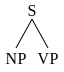

In [52]:
t2 = Tree("S", ["NP", "VP"])
t2

In [53]:
t2 = Tree("S", ["NP", "VP"])
r2 = lang.hk3_system.compose(t2)
r2.tree()
r2.paths()

3 composition paths:<br />
Path [0]:<br />
<div align="center" style="display:table; margin:5px; border-collapse: collapse;border: 1px solid #848482;"><div align="center" style="display:table-row;border-bottom:1px solid #848482"><div style="display:table-cell;vertical-align:middle;"><div style="display: table;"><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:inline-block;"><span>$[\![\mathbf{\text{NP}}]\!]^{}_{?}$</span></div></div></div><div style="align: center; vertical-align: middle; display: table-cell;"><span style="padding:1em;">*</span></div><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:inline-block;"><span>$[\![\mathbf{\text{VP}}]\!]^{}_{?}$</span></div></div></div></div></div><div style="display:table-cell;vertical-align:middle;border-left:1px solid #848482;padding:0.5em"><div style="white-space:nowrap; color:blue;"><b>[<div style="display:inline-block;"><span>FA/left</span></div>]</b></div></div></div><div align="center" style="display:table-row;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:table-cell;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:table;table-layout:auto;" align="center"><div style="display:table-row;"><div style="display:table-cell;padding-right:2px; padding-left:2px;" align="center"><div style="display:inline-block;"><span>$[\![\mathbf{\text{S}}]\!]^{}_{X'}$</span></div></div></div><div style="display:table-row;"><div style="display:table-cell;padding-right:2px; padding-left:2px;" align="center"><div style="display:inline-block;"><span>$[\![\mathbf{\text{NP}}]\!]^{}_{\left\langle{}X,X'\right\rangle{}}([\![\mathbf{\text{VP}}]\!]^{}_{X})$</span></div></div></div></div></div></div><div style="display:table-cell;"></div></div></div><br /><br />Path [1]:<br />
<div align="center" style="display:table; margin:5px; border-collapse: collapse;border: 1px solid #848482;"><div align="center" style="display:table-row;border-bottom:1px solid #848482"><div style="display:table-cell;vertical-align:middle;"><div style="display: table;"><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:inline-block;"><span>$[\![\mathbf{\text{NP}}]\!]^{}_{?}$</span></div></div></div><div style="align: center; vertical-align: middle; display: table-cell;"><span style="padding:1em;">*</span></div><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:inline-block;"><span>$[\![\mathbf{\text{VP}}]\!]^{}_{?}$</span></div></div></div></div></div><div style="display:table-cell;vertical-align:middle;border-left:1px solid #848482;padding:0.5em"><div style="white-space:nowrap; color:blue;"><b>[<div style="display:inline-block;"><span>FA/right</span></div>]</b></div></div></div><div align="center" style="display:table-row;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:table-cell;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:table;table-layout:auto;" align="center"><div style="display:table-row;"><div style="display:table-cell;padding

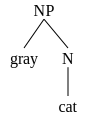

In [54]:
Tree = lamb.utils.get_tree_class()
t = Tree("NP", ["gray", Tree("N", ["cat"])])
t

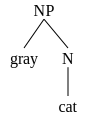

In [55]:
t2 = lang.CompositionTree.tree_factory(t)
r = lang.hk3_system.compose(t2)
r

In [56]:
r.tree()

DisplayNode instance: HTML rendering only

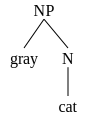

In [57]:
r = lang.hk3_system.expand_all(t2)
r

In [58]:
r.tree()

DisplayNode instance: HTML rendering only

In [59]:
r.paths()

1 composition path:<br /><div align="center" style="display:table; margin:5px; border-collapse: collapse;border: 1px solid #848482;"><div align="center" style="display:table-row;border-bottom:1px solid #848482"><div style="display:table-cell;vertical-align:middle;"><div style="display: table;"><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:table; margin:5px; border-collapse: collapse;border: 1px solid #848482;"><div align="center" style="display:table-row;border-bottom:1px solid #848482"><div style="display:table-cell;vertical-align:middle;"><div style="display: table;"><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:inline-block;"><span>$[\![\mathbf{\text{gray}}]\!]^{}_{\left\langle{}e,t\right\rangle{}}$</span></div></div></div></div></div><div style="display:table-cell;vertical-align:middle;border-left:1px solid #848482;padding:0.5em"><div style="white-space:nowrap; color:blue;"><b>[<div style="display:inline-block;"><span>Lexicon</span></div>]</b></div></div></div><div align="center" style="display:table-row;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:table-cell;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:inline-block;"><span>$\lambda{} x_{e} \: . \: {Gray}({x})$</span></div></div></div><div style="display:table-cell;"></div></div></div></div><div style="align: center; vertical-align: middle; display: table-cell;"><span style="padding:1em;">*</span></div><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:table; margin:5px; border-collapse: collapse;border: 1px solid #848482;"><div align="center" style="display:table-row;border-bottom:1px solid #848482"><div style="display:table-cell;vertical-align:middle;"><div style="display: table;"><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:table; margin:5px; border-collapse: collapse;border: 1px solid #848482;"><div align="center" style="display:table-row;border-bottom:1px solid #848482"><div style="display:table-cell;vertical-align:middle;"><div style="display: table;"><div style="display:table-cell;vertical-align:middle;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:inline-block;"><span>$[\![\mathbf{\text{cat}}]\!]^{}_{\left\langle{}e,t\right\rangle{}}$</span></div></div></div></div></div><div style="display:table-cell;vertical-align:middle;border-left:1px solid #848482;padding:0.5em"><div style="white-space:nowrap; color:blue;"><b>[<div style="display:inline-block;"><span>Lexicon</span></div>]</b></div></div></div><div align="center" style="display:table-row;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div align="center" style="display:table-cell;"><div align="center" style="display:block;padding-left:5px;padding-right:5px;padding-top:5px;padding-bottom:5px;"><div style="display:inline-block;"><span>$\lambda{} x_{e} \: . \: {Cat}({x})$</span></div></div></div><div style="display:table-cell;"></div></div></div></div></div></div><div style="display:table-cell;vertical-align:middle;border-left:1px solid #848482;padding:0.5em"><div style="white-space:nowrap; color:blue;"><b>[<div style="display:inline-block;"><span>NN</span></div>]</b></div></div></div><div align="center" style="display:table-row;padding-left:5px;pa

&nbsp;

## Some future projects, non-exhaustive ##

* complete fragment of Heim and Kratzer
* In general: more fragments!
* extend fragment coverage.  Some interesting targets where interactivity would be useful to understanding:
  * Compositional hamblin semantics (partial)
  * Compositional DRT (partial)
  * QR
* underlying model theory.
* various improvements to the graphics -- trees (d3? graphviz?), interactive widgets, ...
* full latex output (trees in tikz-qtree and so on).

Longer term:

* integration with SymPy (?)
* deeper integration with nltk.
* parsing that makes less use of python `eval`, and is generally less ad-hoc.
  * this is an issue where in principle, a language like Haskell is a better choice than python.  But I think the usability / robustness of python and its libraries has the edge here overall, not to mention ipython notebook...
* toy spatial language system
* side-by-side comparison of e.g. multiple analyses of presupposition projection